## 第零步：分析库导入与分析目标设置
为了更方便地进行数据处理与分析，我们定义了一个基类`DataframeAnalysis`,将输入数据统一处理成`pandas.DataFrame`格式.

目前支持的数据格式有：
- `csv`
- `xlsx`
- `parquet`

输入参数有：
- `root_path`: 所有数据存放的根路径
- `data_path`: 各个数据集在根路径下的子路径

In [1]:
pwd

'/Users/yumeng/Desktop/Data-Process-Library/example/XiexinForecasting/PhotovoltaicPower'

In [2]:
from Analysis.DataframeAnalysis import DataframeAnalysis
import plotly.express as px
import pandas as pd
import os
import plotly.graph_objects as go
# 导入中冶赛迪高炉应用数据
root_path = '/Users/yumeng/Desktop/data/Xiexindata/photovoltaic_power_plant_data'
data_path = 'ps_id_127146_merged.csv'
df = pd.read_csv(os.path.join(root_path, data_path), encoding='utf-8')
DA = DataframeAnalysis(dataFrame=df)
DA.root_path = root_path
DA.data_path = data_path

DataAnalysis loading data from DataFrame with shape: (91078, 30)


In [3]:
# 获得所有列名
DA.df_raw.columns

Index(['sn', 'ts', 'er', 'pac', 'lng', 'lat', 'roof_type', 'angle',
       'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'pressure_msl', 'surface_pressure', 'precipitation_probability',
       'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high',
       'shortwave_radiation', 'direct_radiation', 'direct_normal_irradiance',
       'diffuse_radiation', 'wind_speed_10m', 'wind_speed_80m',
       'wind_speed_120m', 'wind_direction_10m', 'wind_direction_80m',
       'wind_direction_120m', 'variable_date', 'full_time'],
      dtype='object')

In [4]:
DA.df_raw

sn                   ts   er   pac        lng  \
0      GSABZT020K000A231211198  2024-02-07 15:00:00  NaN  8.65  119.59752   
1      GSABZT020K000A231211198  2024-02-07 15:05:00  NaN  8.03  119.59752   
2      GSABZT020K000A231211198  2024-02-07 15:10:00  NaN  7.83  119.59752   
3      GSABZT020K000A231211198  2024-02-07 15:15:00  NaN  7.22  119.59752   
4      GSABZT020K000A231211198  2024-02-07 15:20:00  NaN  6.62  119.59752   
...                        ...                  ...  ...   ...        ...   
91073  GSABZT020K000A231211198  2025-05-10 18:45:00  0.0  0.10  119.59752   
91074  GSABZT020K000A231211198  2025-05-10 18:50:00  0.0  0.03  119.59752   
91075  GSABZT020K000A231211198  2025-05-10 18:55:00  0.0  0.02  119.59752   
91076  GSABZT020K000A231211198  2025-05-10 19:00:00  0.0  0.01  119.59752   
91077  GSABZT020K000A231211198  2025-05-10 19:05:00  0.0  0.00  119.59752   

            lat roof_type  angle  temperature_2m  relative_humidity_2m  ...  \
0      33.59646       平屋顶   15.0          5.8844               47.0433  ...   
1      33.59646       平屋顶   15.0             NaN                   NaN  ...   
2      33.59646       平屋顶   15.0             NaN                   NaN  ...   
3      33.59646       平屋顶   15.0          5.7313               47.5503  ...   
4      33.59646       平屋顶   15.0             NaN                   NaN  ...   
...         ...       ...    ...             ...                   ...  ...   
91073  33.59646       平屋顶   15.0         16.2831               71.4890  ...   
91074  33.59646       平屋顶   15.0             NaN                   NaN  ...   
91075  33.59646       平屋顶   15.0             NaN                   NaN  ...   
91076  33.59646       平屋顶   15.0         15.9856               72.3144  ...   
91077  33.59646       平屋顶   15.0             NaN                   NaN  ...   

       direct_normal_irradiance  diffuse_radiation  wind_speed_10m  \
0                      495.3743           107.6637          3.9683   
1                           NaN                NaN             NaN   
2                           NaN                NaN             NaN   
3                      457.7259            98.3230          3.9594   
4                           NaN                NaN             NaN   
...                         ...                ...             ...   
91073                    2.5220             6.2163          2.6160   
91074                       NaN                NaN             NaN   
91075                       NaN                NaN             NaN   
91076                    1.2610             3.1082          2.5247   
91077                       NaN                NaN             NaN   

       wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0              5.1044           5.3613            351.8724   
1                 NaN              NaN                 NaN   
2                 NaN              NaN                 NaN   
3              5.1071           5.3670            353.6579   
4                 NaN              NaN                 NaN   
...               ...              ...                 ...   
91073          5.0667           5.7690            289.4114   
91074             NaN              NaN                 NaN   
91075             NaN              NaN                 NaN   
91076          5.0480           5.7816            286.5757   
91077             NaN              NaN                 NaN   

       wind_direction_80m  wind_direction_120m        variable_date  \
0                298.1636             298.2838  2024-02-07 15:00:00   
1                     NaN                  NaN                  NaN   
2                     NaN                  NaN                  NaN   
3                245.8651             245.9502  2024-02-07 15:15:00   
4                     NaN                  NaN                  NaN   
...                   ...                  ...                  ...   
91073            293.7344             294.7562  2025-05-10 18:45:00   


In [5]:
DA.plot_column_plotly(columns=['pac'], start_point=0, length=100000)

## 第一步：对齐时间戳
按照功率数据的标准，插值为5min频率

In [6]:
#检查full_time是否全是5min间隔


import pandas as pd

# 确保 full_time 为 datetime 类型
df['full_time'] = pd.to_datetime(df['full_time'])

# 创建严格的 5 分钟间隔时间戳，起止时间取自原 full_time 范围
new_full_time = pd.date_range(
    start=df['full_time'].min(),
    end=df['full_time'].max(),
    freq='5min'  # 推荐用 '5min' 替代 '5T'
)

# 替换旧的 full_time 或创建一个新列
df = df.set_index('full_time')         # 将 full_time 设为索引
df = df.reindex(new_full_time)         # 按严格 5min 间隔重建索引
df.index.name = 'full_time'            # 恢复索引名
df = df.reset_index()                  # 如需使用为普通列

# 保存回 DA.df_raw
DA.df_raw = df



DA.df_raw

full_time                       sn                   ts   er  \
0      2024-02-07 15:00:00  GSABZT020K000A231211198  2024-02-07 15:00:00  NaN   
1      2024-02-07 15:05:00  GSABZT020K000A231211198  2024-02-07 15:05:00  NaN   
2      2024-02-07 15:10:00  GSABZT020K000A231211198  2024-02-07 15:10:00  NaN   
3      2024-02-07 15:15:00  GSABZT020K000A231211198  2024-02-07 15:15:00  NaN   
4      2024-02-07 15:20:00  GSABZT020K000A231211198  2024-02-07 15:20:00  NaN   
...                    ...                      ...                  ...  ...   
131949 2025-05-10 18:45:00  GSABZT020K000A231211198  2025-05-10 18:45:00  0.0   
131950 2025-05-10 18:50:00  GSABZT020K000A231211198  2025-05-10 18:50:00  0.0   
131951 2025-05-10 18:55:00  GSABZT020K000A231211198  2025-05-10 18:55:00  0.0   
131952 2025-05-10 19:00:00  GSABZT020K000A231211198  2025-05-10 19:00:00  0.0   
131953 2025-05-10 19:05:00  GSABZT020K000A231211198  2025-05-10 19:05:00  0.0   

         pac        lng       lat roof_type  angle  temperature_2m  ...  \
0       8.65  119.59752  33.59646       平屋顶   15.0          5.8844  ...   
1       8.03  119.59752  33.59646       平屋顶   15.0             NaN  ...   
2       7.83  119.59752  33.59646       平屋顶   15.0             NaN  ...   
3       7.22  119.59752  33.59646       平屋顶   15.0          5.7313  ...   
4       6.62  119.59752  33.59646       平屋顶   15.0             NaN  ...   
...      ...        ...       ...       ...    ...             ...  ...   
131949  0.10  119.59752  33.59646       平屋顶   15.0         16.2831  ...   
131950  0.03  119.59752  33.59646       平屋顶   15.0             NaN  ...   
131951  0.02  119.59752  33.59646       平屋顶   15.0             NaN  ...   
131952  0.01  119.59752  33.59646       平屋顶   15.0         15.9856  ...   
131953  0.00  119.59752  33.59646       平屋顶   15.0             NaN  ...   

        direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0               193.7455                  495.3743           107.6637   
1                    NaN                       NaN                NaN   
2                    NaN                       NaN                NaN   
3               162.8229                  457.7259            98.3230   
4                    NaN                       NaN                NaN   
...                  ...                       ...                ...   
131949            0.2960                    2.5220             6.2163   
131950               NaN                       NaN                NaN   
131951               NaN                       NaN                NaN   
131952            0.1480                    1.2610             3.1082   
131953               NaN                       NaN                NaN   

        wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0               3.9683          5.1044           5.3613            351.8724   
1                  NaN             NaN              NaN                 NaN   
2                  NaN             NaN              NaN                 NaN   
3               3.9594          5.1071           5.3670            353.6579   
4                  NaN             NaN              NaN                 NaN   
...                ...             ...              ...                 ...   
131949          2.6160          5.0667           5.7690            289.4114   
131950             NaN             NaN              NaN                 NaN   
131951             NaN             NaN              NaN                 NaN   
131952          2.5247          5.0480           5.7816            286.5757   
131953             NaN             NaN              NaN                 NaN   

        wind_direction_80m  wind_direction_120m        variable_date  
0                 298.1636             298.2838  2024-02-07 15:00:00  
1                      NaN                  NaN                  NaN  
2                      NaN                  NaN                  NaN  
3                 245.8651       

## 第二步：缺失值分析

检查数据集中有无缺失值，包括：
- 缺失的特征值
- 缺失的时间戳

In [7]:
# 获得'sn'列包含缺失值的index条目
DA.getNanIndex(start_col='sn',end_col='sn')

(Index([    40,     41,     42,     43,     44,     45,     46,     47,     48,
            49,
        ...
        131773, 131774, 131775, 131776, 131777, 131778, 131779, 131780, 131781,
        131782],
       dtype='int64', length=60871),
 True)

In [8]:
# 'sn'列值都是一样的，用上一行值进行填充
DA.df_raw[['sn']] = DA.df_raw[['sn']].ffill()

In [9]:
# 检查'sn'列空值情况
DA.getNanIndex(start_col='sn',end_col='sn')

(Index([], dtype='int64'), False)

In [10]:
# 获得'ts'列包含缺失值的index条目
DA.getNanIndex(start_col='ts',end_col='ts')

(Index([    40,     41,     42,     43,     44,     45,     46,     47,     48,
            49,
        ...
        131773, 131774, 131775, 131776, 131777, 131778, 131779, 131780, 131781,
        131782],
       dtype='int64', length=60871),
 True)

In [11]:
DA.df_raw['ts'] = DA.df_raw['ts'].fillna(DA.df_raw['full_time'])

In [12]:
# 检查'ts'列空值情况
DA.getNanIndex(start_col='ts',end_col='ts')

(Index([], dtype='int64'), False)

In [13]:
# 获得'er'列包含缺失值的index条目
DA.getNanIndex(start_col='er',end_col='er')

(Index([     0,      1,      2,      3,      4,      5,      6,      7,      8,
             9,
        ...
        131773, 131774, 131775, 131776, 131777, 131778, 131779, 131780, 131781,
        131782],
       dtype='int64', length=62418),
 True)

In [14]:
# 'er'列空值和 0 值都代表无异常，将所有空值全部填充为 0 值
DA.df_raw.loc[:, 'er': 'er'] = DA.df_raw.loc[:, 'er': 'er'].fillna(0)

In [15]:
# 检查'er'列空值情况
DA.getNanIndex(start_col='er',end_col='er')

(Index([], dtype='int64'), False)

In [16]:
# 检查'pac'列空值情况
DA.getNanIndex(start_col='pac',end_col='pac')

(Index([    40,     41,     42,     43,     44,     45,     46,     47,     48,
            49,
        ...
        131773, 131774, 131775, 131776, 131777, 131778, 131779, 131780, 131781,
        131782],
       dtype='int64', length=60871),
 True)

In [17]:
# 'pac'列空值和 0 值都代表无异常，将所有空值全部填充为 0 值
DA.df_raw.loc[:, 'pac': 'pac'] = DA.df_raw.loc[:, 'pac': 'pac'].fillna(0)

In [18]:
# 检查'pac'列空值情况
DA.getNanIndex(start_col='pac',end_col='pac')

(Index([], dtype='int64'), False)

In [19]:
# 检查'lng', 'lat', 'roof_type', 'angle'列的空值情况
DA.getNanIndex(start_col='lng',end_col='angle')

(Index([    40,     41,     42,     43,     44,     45,     46,     47,     48,
            49,
        ...
        131773, 131774, 131775, 131776, 131777, 131778, 131779, 131780, 131781,
        131782],
       dtype='int64', length=60871),
 True)

In [20]:
# 'lng', 'lat', 'roof_type', 'angle'列值都是一样的，用上一行值进行填充
DA.df_raw[['lng', 'lat', 'roof_type', 'angle']] = DA.df_raw[['lng', 'lat', 'roof_type', 'angle']].ffill()

In [21]:
# 检查'lng', 'lat', 'roof_type', 'angle'列的空值情况
DA.getNanIndex(start_col='lng',end_col='angle')

(Index([], dtype='int64'), False)

In [22]:
# 检查气象数据列的空值情况
DA.getNanIndex(start_col='temperature_2m',end_col='wind_direction_120m')

(Index([     1,      2,      4,      5,      7,      8,     10,     11,     13,
            14,
        ...
        131939, 131941, 131942, 131944, 131945, 131947, 131948, 131950, 131951,
        131953],
       dtype='int64', length=88545),
 True)

In [23]:
# 对气象数据进行线性插值
DA.getInterpolate(start_col='temperature_2m', end_col='wind_direction_120m', method='linear')

kwargs: {'method': 'linear'}


full_time                       sn                   ts   er  \
0      2024-02-07 15:00:00  GSABZT020K000A231211198  2024-02-07 15:00:00  0.0   
1      2024-02-07 15:05:00  GSABZT020K000A231211198  2024-02-07 15:05:00  0.0   
2      2024-02-07 15:10:00  GSABZT020K000A231211198  2024-02-07 15:10:00  0.0   
3      2024-02-07 15:15:00  GSABZT020K000A231211198  2024-02-07 15:15:00  0.0   
4      2024-02-07 15:20:00  GSABZT020K000A231211198  2024-02-07 15:20:00  0.0   
...                    ...                      ...                  ...  ...   
131949 2025-05-10 18:45:00  GSABZT020K000A231211198  2025-05-10 18:45:00  0.0   
131950 2025-05-10 18:50:00  GSABZT020K000A231211198  2025-05-10 18:50:00  0.0   
131951 2025-05-10 18:55:00  GSABZT020K000A231211198  2025-05-10 18:55:00  0.0   
131952 2025-05-10 19:00:00  GSABZT020K000A231211198  2025-05-10 19:00:00  0.0   
131953 2025-05-10 19:05:00  GSABZT020K000A231211198  2025-05-10 19:05:00  0.0   

         pac        lng       lat roof_type  angle  temperature_2m  ...  \
0       8.65  119.59752  33.59646       平屋顶   15.0        5.884400  ...   
1       8.03  119.59752  33.59646       平屋顶   15.0        5.833367  ...   
2       7.83  119.59752  33.59646       平屋顶   15.0        5.782333  ...   
3       7.22  119.59752  33.59646       平屋顶   15.0        5.731300  ...   
4       6.62  119.59752  33.59646       平屋顶   15.0        5.659000  ...   
...      ...        ...       ...       ...    ...             ...  ...   
131949  0.10  119.59752  33.59646       平屋顶   15.0       16.283100  ...   
131950  0.03  119.59752  33.59646       平屋顶   15.0       16.183933  ...   
131951  0.02  119.59752  33.59646       平屋顶   15.0       16.084767  ...   
131952  0.01  119.59752  33.59646       平屋顶   15.0       15.985600  ...   
131953  0.00  119.59752  33.59646       平屋顶   15.0       15.985600  ...   

        direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0             193.745500                495.374300         107.663700   
1             183.437967                482.824833         104.550133   
2             173.130433                470.275367         101.436567   
3             162.822900                457.725900          98.323000   
4             152.302333                443.448167          95.045567   
...                  ...                       ...                ...   
131949          0.296000                  2.522000           6.216300   
131950          0.246667                  2.101667           5.180267   
131951          0.197333                  1.681333           4.144233   
131952          0.148000                  1.261000           3.108200   
131953          0.148000                  1.261000           3.108200   

        wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0             3.968300        5.104400         5.361300          351.872400   
1             3.965333        5.105300         5.363200          352.467567   
2             3.962367        5.106200         5.365100          353.062733   
3             3.959400        5.107100         5.367000          353.657900   
4             3.951567        5.100633         5.360967          354.023967   
...                ...             ...              ...                 ...   
131949        2.616000        5.066700         5.769000          289.411400   
131950        2.585567        5.060467         5.773200          288.466167   
131951        2.555133        5.054233         5.777400          287.520933   
131952        2.524700        5.048000         5.781600          286.575700   
131953        2.524700        5.048000         5.781600          286.575700   

        wind_direction_80m  wind_direction_120m        variable_date  
0               298.163600           298.283800  2024-02-07 15:00:00  
1               280.730767           280.839267                  NaN  
2               263.297933           263.394733                  NaN  
3               245.865100       

In [24]:
# 检查气象数据列的空值情况
DA.getNanIndex(start_col='temperature_2m',end_col='wind_direction_120m')

(Index([], dtype='int64'), False)

In [25]:
DA.df_raw['variable_date'] = DA.df_raw['variable_date'].fillna(DA.df_raw['full_time'])

In [26]:
# 检查所有列的空值情况
DA.getNanIndex(start_col='sn',end_col='full_time')

(RangeIndex(start=0, stop=131954, step=1), True)

In [27]:
# 检查时间戳缺失情况
missing_dates, flag, timestamps, expected_range = DA.checkDateContinuity('ts', freq='5min')
print(f"Missing dates {flag}: {missing_dates}")

Missing dates True: DatetimeIndex([], dtype='datetime64[ns]', freq='5min')


In [28]:
DA.df_raw=DA.df_raw.set_index(timestamps)
DA.df_raw

full_time                       sn  \
ts                                                                 
2024-02-07 15:00:00 2024-02-07 15:00:00  GSABZT020K000A231211198   
2024-02-07 15:05:00 2024-02-07 15:05:00  GSABZT020K000A231211198   
2024-02-07 15:10:00 2024-02-07 15:10:00  GSABZT020K000A231211198   
2024-02-07 15:15:00 2024-02-07 15:15:00  GSABZT020K000A231211198   
2024-02-07 15:20:00 2024-02-07 15:20:00  GSABZT020K000A231211198   
...                                 ...                      ...   
2025-05-10 18:45:00 2025-05-10 18:45:00  GSABZT020K000A231211198   
2025-05-10 18:50:00 2025-05-10 18:50:00  GSABZT020K000A231211198   
2025-05-10 18:55:00 2025-05-10 18:55:00  GSABZT020K000A231211198   
2025-05-10 19:00:00 2025-05-10 19:00:00  GSABZT020K000A231211198   
2025-05-10 19:05:00 2025-05-10 19:05:00  GSABZT020K000A231211198   

                                     ts   er   pac        lng       lat  \
ts                                                                        
2024-02-07 15:00:00 2024-02-07 15:00:00  0.0  8.65  119.59752  33.59646   
2024-02-07 15:05:00 2024-02-07 15:05:00  0.0  8.03  119.59752  33.59646   
2024-02-07 15:10:00 2024-02-07 15:10:00  0.0  7.83  119.59752  33.59646   
2024-02-07 15:15:00 2024-02-07 15:15:00  0.0  7.22  119.59752  33.59646   
2024-02-07 15:20:00 2024-02-07 15:20:00  0.0  6.62  119.59752  33.59646   
...                                 ...  ...   ...        ...       ...   
2025-05-10 18:45:00 2025-05-10 18:45:00  0.0  0.10  119.59752  33.59646   
2025-05-10 18:50:00 2025-05-10 18:50:00  0.0  0.03  119.59752  33.59646   
2025-05-10 18:55:00 2025-05-10 18:55:00  0.0  0.02  119.59752  33.59646   
2025-05-10 19:00:00 2025-05-10 19:00:00  0.0  0.01  119.59752  33.59646   
2025-05-10 19:05:00 2025-05-10 19:05:00  0.0  0.00  119.59752  33.59646   

                    roof_type  angle  temperature_2m  ...  direct_radiation  \
ts                                                    ...                     
2024-02-07 15:00:00       平屋顶   15.0        5.884400  ...        193.745500   
2024-02-07 15:05:00       平屋顶   15.0        5.833367  ...        183.437967   
2024-02-07 15:10:00       平屋顶   15.0        5.782333  ...        173.130433   
2024-02-07 15:15:00       平屋顶   15.0        5.731300  ...        162.822900   
2024-02-07 15:20:00       平屋顶   15.0        5.659000  ...        152.302333   
...                       ...    ...             ...  ...               ...   
2025-05-10 18:45:00       平屋顶   15.0       16.283100  ...          0.296000   
2025-05-10 18:50:00       平屋顶   15.0       16.183933  ...          0.246667   
2025-05-10 18:55:00       平屋顶   15.0       16.084767  ...          0.197333   
2025-05-10 19:00:00       平屋顶   15.0       15.985600  ...          0.148000   
2025-05-10 19:05:00       平屋顶   15.0       15.985600  ...          0.148000   

                     direct_normal_irradiance  diffuse_radiation  \
ts                                                                 
2024-02-07 15:00:00                495.374300         107.663700   
2024-02-07 15:05:00                482.824833         104.550133   
2024-02-07 15:10:00                470.275367         101.436567   
2024-02-07 15:15:00                457.725900          98.323000   
2024-02-07 15:20:00                443.448167          95.045567   
...                                       ...                ...   
2025-05-10 18:45:00                  2.522000           6.216300   
2025-05-10 18:50:00                  2.101667           5.180267   
2025-05-10 18:55:00                  1.681333           4.144233   
2025-05-10 19:00:00                  1.261000           3.108200   
2025-05-10 19:05:00                  1.261000           3.108200   

                     wind_speed_10m  wind_speed_80m  wind_speed_120m  \
ts                                                                     
2024-02-07 15:00:00        3.968300        5.104400         5.361300   
2024-02-07 15:05:00        3.965333     

In [29]:
DA.df_raw = DA.df_raw.reindex(expected_range)

In [30]:
# 获取插入位置（wind_direction_120m 的索引 + 1）
insert_pos = DA.df_raw.columns.get_loc('wind_direction_120m') + 1

# 插入 'pac_copy' 列作为 'pac' 的副本
DA.df_raw.insert(loc=insert_pos, column='pac_copy', value=DA.df_raw['pac'])

In [31]:
DA.df_raw

full_time                       sn  \
2024-02-07 15:00:00 2024-02-07 15:00:00  GSABZT020K000A231211198   
2024-02-07 15:05:00 2024-02-07 15:05:00  GSABZT020K000A231211198   
2024-02-07 15:10:00 2024-02-07 15:10:00  GSABZT020K000A231211198   
2024-02-07 15:15:00 2024-02-07 15:15:00  GSABZT020K000A231211198   
2024-02-07 15:20:00 2024-02-07 15:20:00  GSABZT020K000A231211198   
...                                 ...                      ...   
2025-05-10 18:45:00 2025-05-10 18:45:00  GSABZT020K000A231211198   
2025-05-10 18:50:00 2025-05-10 18:50:00  GSABZT020K000A231211198   
2025-05-10 18:55:00 2025-05-10 18:55:00  GSABZT020K000A231211198   
2025-05-10 19:00:00 2025-05-10 19:00:00  GSABZT020K000A231211198   
2025-05-10 19:05:00 2025-05-10 19:05:00  GSABZT020K000A231211198   

                                     ts   er   pac        lng       lat  \
2024-02-07 15:00:00 2024-02-07 15:00:00  0.0  8.65  119.59752  33.59646   
2024-02-07 15:05:00 2024-02-07 15:05:00  0.0  8.03  119.59752  33.59646   
2024-02-07 15:10:00 2024-02-07 15:10:00  0.0  7.83  119.59752  33.59646   
2024-02-07 15:15:00 2024-02-07 15:15:00  0.0  7.22  119.59752  33.59646   
2024-02-07 15:20:00 2024-02-07 15:20:00  0.0  6.62  119.59752  33.59646   
...                                 ...  ...   ...        ...       ...   
2025-05-10 18:45:00 2025-05-10 18:45:00  0.0  0.10  119.59752  33.59646   
2025-05-10 18:50:00 2025-05-10 18:50:00  0.0  0.03  119.59752  33.59646   
2025-05-10 18:55:00 2025-05-10 18:55:00  0.0  0.02  119.59752  33.59646   
2025-05-10 19:00:00 2025-05-10 19:00:00  0.0  0.01  119.59752  33.59646   
2025-05-10 19:05:00 2025-05-10 19:05:00  0.0  0.00  119.59752  33.59646   

                    roof_type  angle  temperature_2m  ...  \
2024-02-07 15:00:00       平屋顶   15.0        5.884400  ...   
2024-02-07 15:05:00       平屋顶   15.0        5.833367  ...   
2024-02-07 15:10:00       平屋顶   15.0        5.782333  ...   
2024-02-07 15:15:00       平屋顶   15.0        5.731300  ...   
2024-02-07 15:20:00       平屋顶   15.0        5.659000  ...   
...                       ...    ...             ...  ...   
2025-05-10 18:45:00       平屋顶   15.0       16.283100  ...   
2025-05-10 18:50:00       平屋顶   15.0       16.183933  ...   
2025-05-10 18:55:00       平屋顶   15.0       16.084767  ...   
2025-05-10 19:00:00       平屋顶   15.0       15.985600  ...   
2025-05-10 19:05:00       平屋顶   15.0       15.985600  ...   

                     direct_normal_irradiance  diffuse_radiation  \
2024-02-07 15:00:00                495.374300         107.663700   
2024-02-07 15:05:00                482.824833         104.550133   
2024-02-07 15:10:00                470.275367         101.436567   
2024-02-07 15:15:00                457.725900          98.323000   
2024-02-07 15:20:00                443.448167          95.045567   
...                                       ...                ...   
2025-05-10 18:45:00                  2.522000           6.216300   
2025-05-10 18:50:00                  2.101667           5.180267   
2025-05-10 18:55:00                  1.681333           4.144233   
2025-05-10 19:00:00                  1.261000           3.108200   
2025-05-10 19:05:00                  1.261000           3.108200   

                     wind_speed_10m  wind_speed_80m  wind_speed_120m  \
2024-02-07 15:00:00        3.968300        5.104400         5.361300   
2024-02-07 15:05:00        3.965333        5.105300         5.363200   
2024-02-07 15:10:00        3.962367        5.106200         5.365100   
2024-02-07 15:15:00        3.959400        5.107100         5.367000   
2024-02-07 15:20:00        3.951567        5.100633         5.360967   
...                             ...             ...              ...   
2025-05-10 18:45:00        2.616000        5.066700         5.769000   
2025-05-10 18:50:00        2.585567        5.060467         5.773200   
2025-05-10 18:55:00        2.555133        5.054233         5.777400   
2025-05-10 19:00:00        2.524700       

In [32]:
# 检查所有列的空值情况
DA.getNanIndex(start_col='full_time',end_col='variable_date')

(DatetimeIndex([], dtype='datetime64[ns]', freq='5min'), False)

In [33]:
DA.plot_column_plotly(columns=['pac'])

## 第三步：基础统计量分析
借助数据中的统计量，我们可以了解到数据最直观的分布情况，为后续的分析打下基础。

目前包含的分析目标有：
- 数据形状
- 每列均值
- 每列方差
- 每列标准差
- 每列最大值
- 每列最小值
- 每列中位数
- 每列分位数

In [34]:
# 获取数据形状：（序列长度，变量数）
DA.getShape()

(131954, 31)

In [35]:
# 去掉非浮点数类型的变量，防止影响统计分析
DA.df_raw.drop(columns=['roof_type'], inplace=True)

In [36]:
# 获取数据每一列的均值
Average = DA.getAverageColumn(start_col='temperature_2m',end_col='pac_copy')
Average

feature      average
0              temperature_2m    15.396434
1        relative_humidity_2m    67.123750
2                dew_point_2m     8.544221
3                pressure_msl  1016.469497
4            surface_pressure  1015.867372
5   precipitation_probability    11.490084
6                 cloud_cover    56.258408
7             cloud_cover_low    14.537499
8             cloud_cover_mid    22.748259
9            cloud_cover_high    44.027889
10        shortwave_radiation   172.155914
11           direct_radiation    97.612968
12   direct_normal_irradiance   155.730257
13          diffuse_radiation    74.542946
14             wind_speed_10m     3.044310
15             wind_speed_80m     4.987921
16            wind_speed_120m     5.520301
17         wind_direction_10m   161.381963
18         wind_direction_80m   159.372498
19        wind_direction_120m   158.996760
20                   pac_copy     3.374939

In [37]:
fig = px.bar(Average, x='feature', y='average',color='average')
fig.show()

In [38]:
# 获取数据每一列的方差
Variance = DA.getVarianceColumn(start_col='temperature_2m',end_col='pac_copy')
Variance

feature      variance
0              temperature_2m    104.035694
1        relative_humidity_2m    447.015128
2                dew_point_2m    123.078232
3                pressure_msl     90.601553
4            surface_pressure     90.157619
5   precipitation_probability    852.262105
6                 cloud_cover   1859.931050
7             cloud_cover_low    882.545381
8             cloud_cover_mid   1304.036563
9            cloud_cover_high   1936.082136
10        shortwave_radiation  58806.697063
11           direct_radiation  27480.314350
12   direct_normal_irradiance  53581.845075
13          diffuse_radiation   9016.211890
14             wind_speed_10m      2.021271
15             wind_speed_80m      4.197016
16            wind_speed_120m      5.067072
17         wind_direction_10m   9366.594288
18         wind_direction_80m   9065.919963
19        wind_direction_120m   9007.145454
20                   pac_copy     26.398169

In [39]:
fig = px.bar(Variance, x='feature', y='variance',color='variance')
fig.show()

In [40]:
# 获取数据每一列的标准差
Std = DA.getStdColumn(start_col='temperature_2m',end_col='pac_copy')
Std

feature  standard deviation
0              temperature_2m           10.199789
1        relative_humidity_2m           21.142732
2                dew_point_2m           11.094063
3                pressure_msl            9.518485
4            surface_pressure            9.495137
5   precipitation_probability           29.193528
6                 cloud_cover           43.126918
7             cloud_cover_low           29.707665
8             cloud_cover_mid           36.111446
9            cloud_cover_high           44.000933
10        shortwave_radiation          242.500922
11           direct_radiation          165.771874
12   direct_normal_irradiance          231.477526
13          diffuse_radiation           94.953736
14             wind_speed_10m            1.421714
15             wind_speed_80m            2.048662
16            wind_speed_120m            2.251016
17         wind_direction_10m           96.781167
18         wind_direction_80m           95.215125
19        wind_direction_120m           94.905982
20                   pac_copy            5.137915

In [41]:
fig = px.bar(Std, x='feature', y='standard deviation',color='standard deviation')
fig.show()

In [42]:
# 获取数据每一列的最大值
maxval = DA.getMaxColumn(start_col='temperature_2m',end_col='pac_copy')
maxval

feature  max value
0              temperature_2m    37.3690
1        relative_humidity_2m    99.7154
2                dew_point_2m    28.6120
3                pressure_msl  1040.1781
4            surface_pressure  1039.5261
5   precipitation_probability   100.0000
6                 cloud_cover   100.0000
7             cloud_cover_low   100.0000
8             cloud_cover_mid   100.0000
9            cloud_cover_high   100.0000
10        shortwave_radiation   919.2058
11           direct_radiation   701.8665
12   direct_normal_irradiance   790.8934
13          diffuse_radiation   422.3278
14             wind_speed_10m    10.0902
15             wind_speed_80m    14.8304
16            wind_speed_120m    15.9875
17         wind_direction_10m   357.8254
18         wind_direction_80m   358.2545
19        wind_direction_120m   358.1193
20                   pac_copy    21.9400

In [43]:
fig = px.bar(maxval, x='feature', y='max value',color='max value')
fig.show()

In [44]:
# 获取数据每一列的最小值
minval = DA.getMinColumn(start_col='temperature_2m',end_col='pac_copy')
minval

feature  min value
0              temperature_2m    -6.0184
1        relative_humidity_2m     6.4150
2                dew_point_2m   -21.0957
3                pressure_msl   993.1012
4            surface_pressure   992.5343
5   precipitation_probability     0.0000
6                 cloud_cover     0.0000
7             cloud_cover_low     0.0000
8             cloud_cover_mid     0.0000
9            cloud_cover_high     0.0000
10        shortwave_radiation     0.0000
11           direct_radiation     0.0000
12   direct_normal_irradiance     0.0000
13          diffuse_radiation     0.0000
14             wind_speed_10m     0.0928
15             wind_speed_80m     0.1898
16            wind_speed_120m     0.1908
17         wind_direction_10m     1.3741
18         wind_direction_80m     1.0048
19        wind_direction_120m     1.4640
20                   pac_copy     0.0000

In [45]:
fig = px.bar(minval, x='feature', y='min value',color='min value')
fig.show()

In [46]:
# 获取数据每一列的中位数
median = DA.getMedianColumn(start_col='temperature_2m',end_col='pac_copy')
median

feature       median
0              temperature_2m    15.261183
1        relative_humidity_2m    70.441533
2                dew_point_2m     8.872500
3                pressure_msl  1016.416550
4            surface_pressure  1015.820267
5   precipitation_probability     0.000000
6                 cloud_cover    70.585000
7             cloud_cover_low     0.003600
8             cloud_cover_mid     0.582367
9            cloud_cover_high    27.541350
10        shortwave_radiation    15.602017
11           direct_radiation     0.947567
12   direct_normal_irradiance     4.309533
13          diffuse_radiation    12.441250
14             wind_speed_10m     2.802150
15             wind_speed_80m     4.929600
16            wind_speed_120m     5.512148
17         wind_direction_10m   148.996000
18         wind_direction_80m   148.521550
19        wind_direction_120m   148.513217
20                   pac_copy     0.020000

In [47]:
fig = px.bar(median, x='feature', y='median',color='median')
fig.show()

In [48]:
# 获取数据每一列的分位数：定义percent值以设置分为数
DA.getQuantileColumn(percent=[1/3,2/3], start_col='temperature_2m',end_col='pac_copy')

temperature_2m  relative_humidity_2m  dew_point_2m  pressure_msl  \
0.333333        9.956011             59.079367      2.525956   1010.996833   
0.666667       21.219711             80.107556     13.800600   1021.947667   

          surface_pressure  precipitation_probability  cloud_cover  \
0.333333       1010.407600                        0.0    17.826567   
0.666667       1021.331111                        0.0    98.883900   

          cloud_cover_low  cloud_cover_mid  cloud_cover_high  ...  \
0.333333         0.000000         0.000000          0.331248  ...   
0.666667         2.625422        11.554561         86.984200  ...   

          direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0.333333          0.000000                  0.000000           0.000000   
0.666667         46.218078                122.353456         106.229833   

          wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0.333333        2.255611        4.046300         4.497011          105.973744   
0.666667        3.476600        5.782356         6.467778          202.879689   

          wind_direction_80m  wind_direction_120m  pac_copy  
0.333333          105.895933           106.000322      0.00  
0.666667          199.855222           199.458989      2.79  

[2 rows x 21 columns]

## 第四步：变量相关性分析
真实工业智能化应用数据往往是具有复杂相关性的多变量数据，挖掘不同变量之间的相关性与各个变量的自相关性可以获取对于下游任务宝贵的数据先验知识。

目前包含的相关性分析类型有：
- 互相关性分析
- 自相关性分析

In [49]:
# 获取所有序列两两之间的互相关性：定义method以指定计算相关性标准（'pearson' | 'kendall' | 'spearman'）
CrossCorr = DA.getCorr(method='pearson', start_col='temperature_2m',end_col='pac_copy')
CrossCorr

temperature_2m  relative_humidity_2m  dew_point_2m  \
temperature_2m                   1.000000             -0.016157      0.853554   
relative_humidity_2m            -0.016157              1.000000      0.492842   
dew_point_2m                     0.853554              0.492842      1.000000   
pressure_msl                    -0.830862             -0.187271     -0.805358   
surface_pressure                -0.830165             -0.187652     -0.804940   
precipitation_probability        0.115450              0.314185      0.247866   
cloud_cover                      0.118049              0.213212      0.212300   
cloud_cover_low                 -0.003365              0.278134      0.131793   
cloud_cover_mid                 -0.112781              0.204782      0.002048   
cloud_cover_high                 0.146016              0.128910      0.192209   
shortwave_radiation              0.351375             -0.432963      0.085967   
direct_radiation                 0.302043             -0.434861      0.038896   
direct_normal_irradiance         0.224525             -0.461773     -0.041151   
diffuse_radiation                0.370059             -0.346551      0.151645   
wind_speed_10m                   0.153027             -0.233343      0.005127   
wind_speed_80m                  -0.007337             -0.084099     -0.056125   
wind_speed_120m                 -0.044844             -0.050134     -0.070880   
wind_direction_10m              -0.206753             -0.157718     -0.265562   
wind_direction_80m              -0.170385             -0.167202     -0.239116   
wind_direction_120m             -0.156236             -0.169658     -0.227999   
pac_copy                         0.284487             -0.487938     -0.001516   

                           pressure_msl  surface_pressure  \
temperature_2m                -0.830862         -0.830165   
relative_humidity_2m          -0.187271         -0.187652   
dew_point_2m                  -0.805358         -0.804940   
pressure_msl                   1.000000          0.999999   
surface_pressure               0.999999          1.000000   
precipitation_probability     -0.198608         -0.198722   
cloud_cover                   -0.133181         -0.133155   
cloud_cover_low               -0.049092         -0.049183   
cloud_cover_mid                0.072587          0.072477   
cloud_cover_high              -0.177752         -0.177748   
shortwave_radiation           -0.110055         -0.109477   
direct_radiation              -0.070921         -0.070382   
direct_normal_irradiance       0.004848          0.005357   
diffuse_radiation             -0.157253         -0.156719   
wind_speed_10m                -0.150843         -0.150773   
wind_speed_80m                -0.090296         -0.090474   
wind_speed_120m               -0.072809         -0.073038   
wind_direction_10m             0.135707          0.135479   
wind_direction_80m             0.086184          0.085947   
wind_direction_120m            0.070116          0.069881   
pac_copy                      -0.036484         -0.035918   

                           precipitation_probability  cloud_cover  \
temperature_2m                              0.115450     0.118049   
relative_humidity_2m                        0.314185     0.213212   
dew_point_2m                                0.247866     0.212300   
pressure_msl                               -0.198608    -0.133181   
surface_pressure                           -0.198722    -0.133155   
precipitation_probability                   1.000000     0.298559   
cloud_cover                                 0.298559     1.000000   
cloud_cover_low                             0.397506     0.384955   
cloud_cover_mid                             0.483818     0.525636   
cloud_cover_high                            0.187951     0.826559   
shortwave_radiation                        -0.068654    -0.139192   
direct_radiation                           -0.110034    -0.255789   
dire

In [50]:
fig = px.imshow(CrossCorr, width=1000, height=1000)
fig.show()

In [51]:
# 获取所有序列自相关系数：定义lag以指定计算自相关的滞后期数（时间间隔）
SelfCorr = DA.getSelfCorr(lag=96, start_col='temperature_2m',end_col='pac_copy')
SelfCorr

feature  self correlation
0              temperature_2m          0.826091
1        relative_humidity_2m          0.344801
2                dew_point_2m          0.961985
3                pressure_msl          0.969490
4            surface_pressure          0.969496
5   precipitation_probability          0.382378
6                 cloud_cover          0.502465
7             cloud_cover_low          0.504996
8             cloud_cover_mid          0.515887
9            cloud_cover_high          0.441092
10        shortwave_radiation         -0.353624
11           direct_radiation         -0.266668
12   direct_normal_irradiance         -0.256787
13          diffuse_radiation         -0.364470
14             wind_speed_10m          0.479282
15             wind_speed_80m          0.494020
16            wind_speed_120m          0.460385
17         wind_direction_10m          0.486331
18         wind_direction_80m          0.504339
19        wind_direction_120m          0.503381
20                   pac_copy         -0.341624

In [52]:
fig = px.bar(SelfCorr, x='feature', y='self correlation',color='self correlation')
fig.show()

## 第五步：周期性分析

In [53]:
# 获取3个最主要的周期
topk, sample_freq = DA.getFFTtopk('pac')
topk

{'top_k_power': array([ 79502.69235307, 144691.26200824, 342637.10216815]),
 'fft_periods': array([143, 144, 288])}

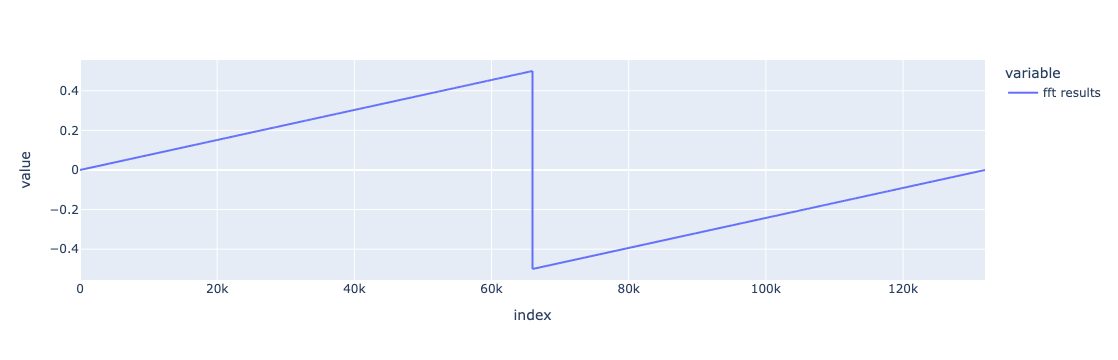

In [54]:
fig = px.line(sample_freq)
fig.show()

## 第六步：变量平稳性分析
针对变量平稳性的分析可以展示数据中的异常变化与波动。

目前包含的平稳性分析方法有：
- ADF
- Phillips-Perron
- DF-GLS
- KPSS
- Zivot-Andrew
- Variance Ratio

In [55]:
# 获取ADF平稳性测试结果
DA.getADF(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': -46.68628560539755,
  'P-value': 0.0,
  'Lags': np.int64(48),
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
     Augmented Dickey-Fuller Results   
  Test Statistic                -46.686
  P-value                         0.000
  Lags                               48
  -------------------------------------
  
  Trend: Constant
  Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}

In [56]:
# 获取Phillips-Perron平稳性测试结果
DA.getPhillipsPerron(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': np.float64(-52.4004196418865),
  'P-value': 0.0,
  'Lags': 73,
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
       Phillips-Perron Test (Z-tau)    
  Test Statistic                -52.400
  P-value                         0.000
  Lags                               73
  -------------------------------------
  
  Trend: Constant
  Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}

In [57]:
# 获取DF-GLS平稳性测试结果
DA.getDFGLS(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': -27.699652818669602,
  'P-value': 0.0,
  'Lags': np.int64(48),
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
        Dickey-Fuller GLS Results      
  Test Statistic                -27.700
  P-value                         0.000
  Lags                               48
  -------------------------------------
  
  Trend: Constant
  Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}